# First attempt at optimising and trying to fit paramters

In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import foreground_functions_old as ff1
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term
# from scipy.stats import kstest, norm
from scipy.optimize import minimize

#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
# beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

crit = 2/np.log(10)
sigma_default = crit/3

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9

Populating the interactive namespace from numpy and matplotlib


In [3]:
%autoreload

In [9]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [10]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [11]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [12]:
print(res.x)

[1. 1. 1. 1. 1.]


In [13]:
data = hp.anafast(ff.map_full_power(30e9))
freq = 30e9

In [14]:
def test(param):
    return ff.chi2(data, freq, param)

In [15]:
x_0 = np.array([-3.0, -3.2, -2.1])

In [26]:
x_1 = np.array([-2.4, -3.7, -2.4])

In [31]:
start=time.time()
minimum = minimize(test, x_0, options={'disp': True})

print(time.time()-start)

         Current function value: 2694.499474
         Iterations: 1
         Function evaluations: 101
         Gradient evaluations: 18
516.5789790153503


In [27]:
start = time.time()
minimum1 = minimize(test, x_1, options={'xtol': 1e-8, 'disp': True})
print(time.time()-start)

521.1618440151215


In [32]:
print(minimum.x)

[-3.00000019 -3.20000016 -2.1       ]


In [28]:
print(minimum1.x)

[-2.39998695 -3.69997308 -2.39999714]


In [29]:
#so seems like this optimizaiton isn't moving anywhere else. check if this is a problem with the function
#or if the surfaces are difficult to move about...

In [9]:
amp_cls, amp_map = ff.map_amp(alpha=-3.4)
bcls, beta_map = ff.map_power_beta(beta=-4.0)

In [54]:
%lprun -f ff.get_wigner_sum ff.get_wigner_sum(384, amp_cls, bcls)

In [55]:
%autoreload

In [14]:
#compare the results of wigner 3j before and after fiddling
start = time.time()
wignersum_new = ff.get_wigner_sum(384, amp_cls, bcls)
print(time.time()-start)

3.566870927810669


In [13]:
start=time.time()
wignersum_old = ff1.get_wigner_sum(384, amp_cls, bcls)
print(time.time()-start)

5.807032823562622


In [12]:
wignersum_new-wignersum_old

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
#compare between the 1x1 moment
mom1x1_new = ff.auto1x1(freqs)
mom1x1_old = ff1.auto1x1(freqs)

In [46]:
# mom1x1_new-mom1x1_old

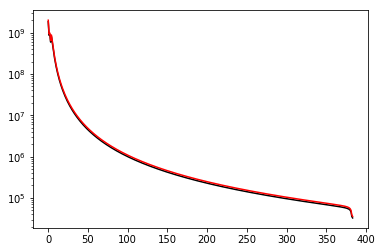

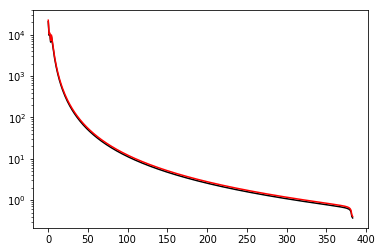

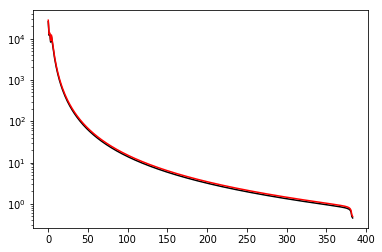

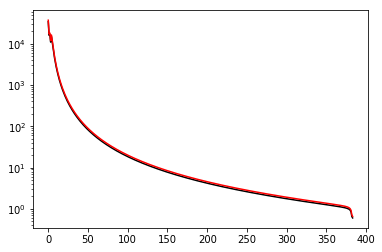

In [47]:
for i in range(len(freqs)):
    figure()
    semilogy(mom1x1_old[i], 'k');
    semilogy(mom1x1_new[i], 'r');

In [48]:
%autoreload

In [49]:
bcls, beta_map = ff.map_power_beta()

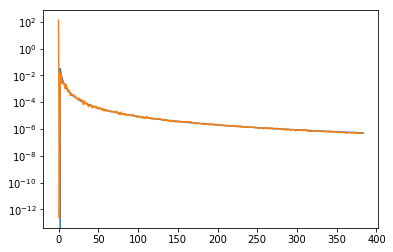

In [50]:
semilogy(bcls)
semilogy(hp.anafast(beta_map))

In [51]:
ells = np.arange(384)

In [61]:
gammas = linspace(-4,-2.01,100)
std = np.zeros_like(gammas)

In [64]:
for i in range(len(gammas)):
    bcls = ff.powerlaw(ells, gammas[i])
    beta_map = hp.synfast(bcls, nside=ff.nside_default, new=True, verbose=False)
    std[i] = np.std(beta_map)

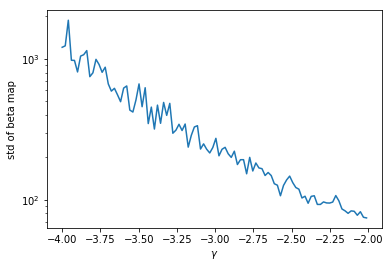

In [69]:
semilogy(gammas, std)
xlabel(r'$\gamma$')
ylabel(r'std of beta map');

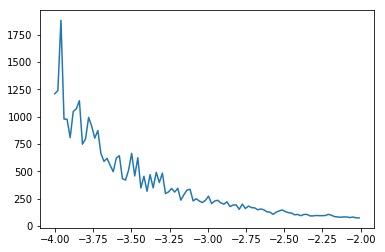

In [65]:
plot(gammas, std)